In [342]:
# have trouble getting auc up
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import sys
import imblearn

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

from collections import Counter
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

from numpy import mean

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
import pandas
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LinearRegression

#look at requirement already satisfied


In [343]:
df = pd.read_csv("term-deposit-marketing-2020.csv")

In [344]:
df.head()
#maintain the column name , don't change the excel data sheet. how to read and change datasheet in python. 

#which is continuous and which is category? category , did you get a loan or not? 

# Using columns attribute. 1 = yes, no = 0    

#x1 age = continuous    

#x2 job = categorical       

#x3 marital =  categorical  

#x4 education = categorical

#x5 default = categorical

#x6 balance = continuous                                    

#x7 housing = categorical

#x8 loan    = categorical

#x9 contact = categorical

#x10 day   = continuous

#x11 month  = categorical

#x12 duration  = continous 

#x13 campaign   = continuous (includes last contact)

#y independent variable subscribed = categorical

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


In [345]:
df.info() #no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [346]:
df.describe()

#Continuous columns described

# x1 age mean = 40.54

#x6 balance mean = 1274.27

#x10 day mean = 16.01

#x12 duration mean= 2.88

#x13 campaign mean = 2.88


,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [347]:
#this is for categorical values.

df.job.unique()





array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [348]:
df.marital.unique()

array(['married', 'single', 'divorced'], dtype=object)

In [349]:
df.education.unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [350]:
df.default.unique()

array(['no', 'yes'], dtype=object)

In [351]:
df.housing.unique()

array(['yes', 'no'], dtype=object)

In [352]:
df.loan.unique()

array(['no', 'yes'], dtype=object)

In [353]:
df.contact.unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [354]:
df.month.unique()

array(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan', 'feb',
       'mar', 'apr'], dtype=object)

In [355]:
df.y.unique()

array(['no', 'yes'], dtype=object)

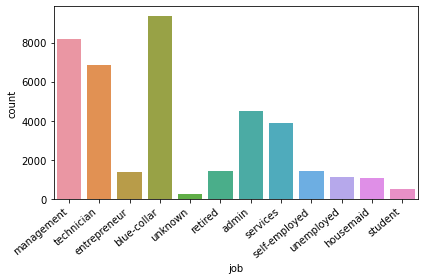

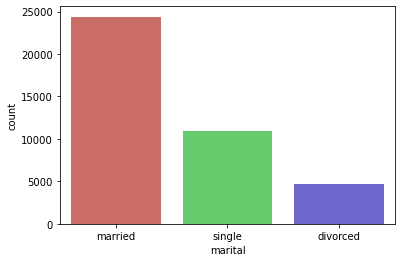

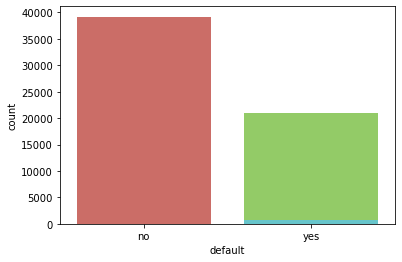

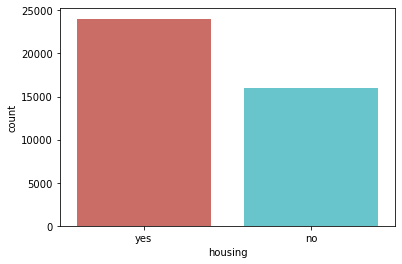

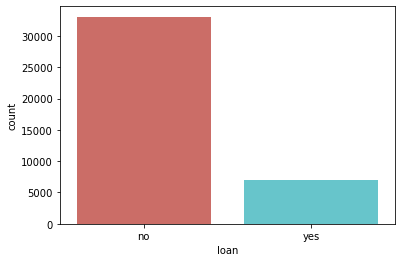

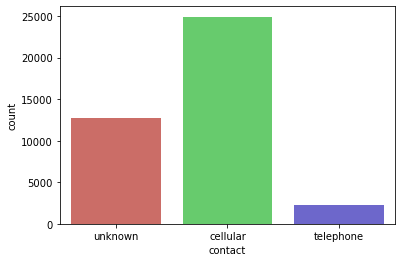

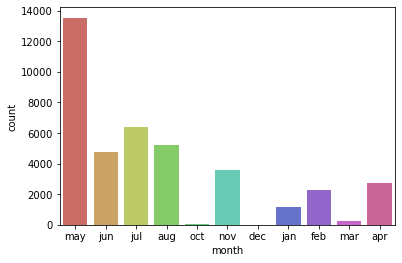

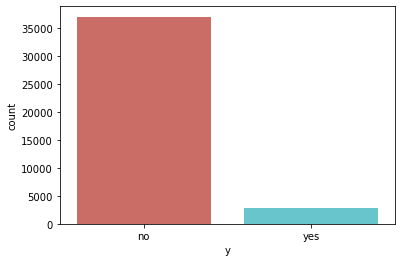

In [356]:
#DIPP   Descriptive, investigative, predictive, prescribtive





#blue collar ranks highest on job with over 8,000 individuals
#unkown ranked lowest at around 100 individuals.

#Marital Status
#Married is the highest count with around 24,000 people. Divorced has the lowest around 4,000 people.

#default= for all people who did not default, they contacted them if they need a loan.
#The default no count is highest with a count around 37,000 people and a no count of 19,000 people.

#housing is seen with the highest count being yes with around 24,000 people and a count of no around 15,000 people.

#Loan = have they taken a loan before? contact people who haven't taken a loan.
#highest count is under no with around 35,000 people and a no count of 6,000 people.

#ways of contacting is seen with the highest count in cellular around 24,0000 people and the lowest count under telephone with 2,000 people.

#month = may seems to be highest out of all months
# May is the highest count around 13,500 people and the lowest is in october with around 100 people.

#y count independent variable = majority are not subsribed
#the majority of people are not subsribed with a no count of 37,104 and a not subscribed count of 2896.

# The highest amount of customers are seen in married, blue collar indivividuals. 

#May has a very high amount of customers versus october which has very few. Why is this?

ax = sns.countplot(x="job", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()


sns.countplot(x='marital' ,data=(df), palette='hls')
plt.show()

sns.countplot(x='education' ,data=(df), palette='hls')

sns.countplot(x='default' ,data=(df), palette='hls')
plt.show()

sns.countplot(x='housing' ,data=(df), palette='hls')
plt.show()

sns.countplot(x='loan' ,data=(df), palette='hls')
plt.show()

sns.countplot(x='contact' ,data=(df), palette='hls')
plt.show()

sns.countplot(x='month' ,data=(df), palette='hls')
plt.show()

sns.countplot(x='y' ,data=(df), palette='hls')
plt.show()




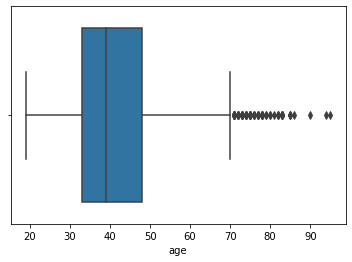

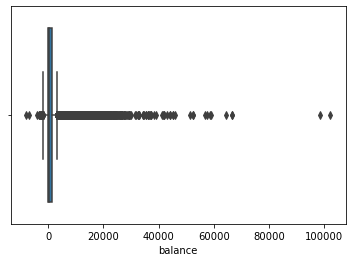

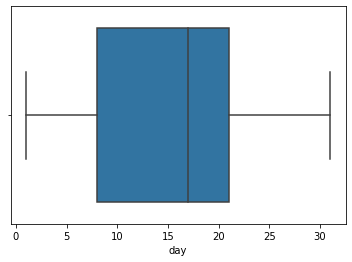

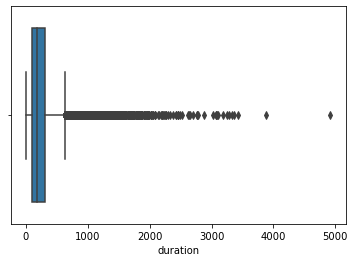

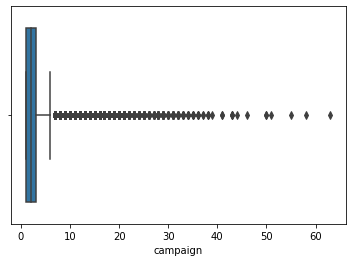

In [357]:
#outliers are seen in age, balance, duration, and campaign. 
#the interval for age was between 20-70 years old. 
#the balance interval was between under 0 and 2000 dollars.
#the duration interval is between 0 and 500 minutes.
#the campaign is between numbers 2 and 5.

# what are the values ? try explaining to non technical friend. what is an outlier? needs to be explained to someone non technical. 
sns.boxplot(x=df['age'])
plt.show()
sns.boxplot(x=df['balance'])
plt.show()
sns.boxplot(x=df['day'])
plt.show()
sns.boxplot(x=df['duration'])
plt.show()
sns.boxplot(x=df['campaign'])
plt.show()

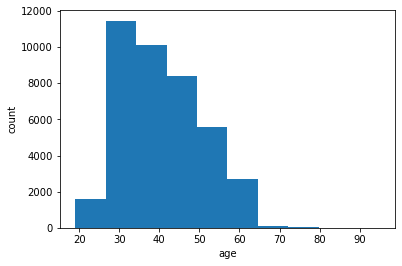

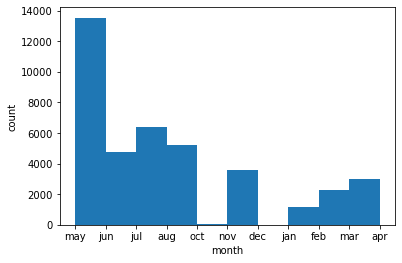

<function matplotlib.pyplot.show(close=None, block=None)>

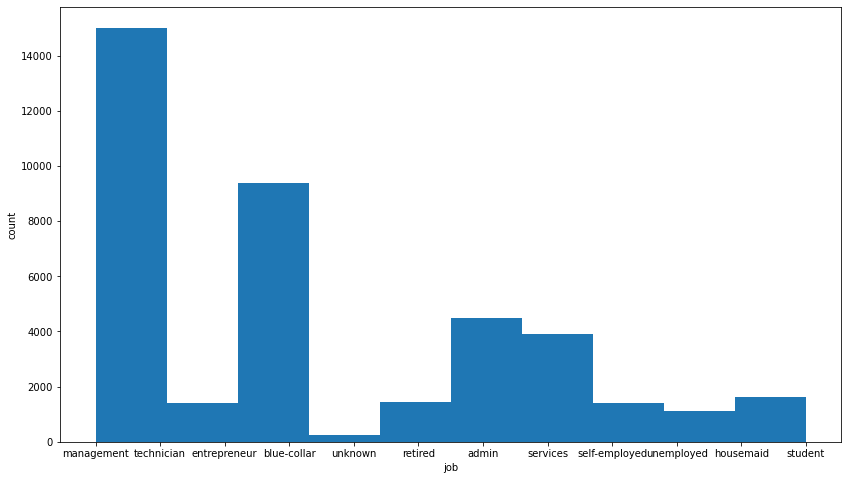

In [358]:
# Histogram , explain to non technical friend. 

#This graphs displays data with bar's of differing heights. 
#We are looking at age of count, month of count, and count of career positions.
#The count is the number of individuals for that bar.
plt.hist(df['age'])
plt.xlabel("age")
plt.ylabel("count")
plt.show()

plt.hist(df['month'])
plt.xlabel("month")
plt.ylabel("count")
plt.show()

fig, ax = plt.subplots(figsize=(14, 8))
plt.hist(df['job'])
plt.xlabel("job")
plt.ylabel("count")
plt.show






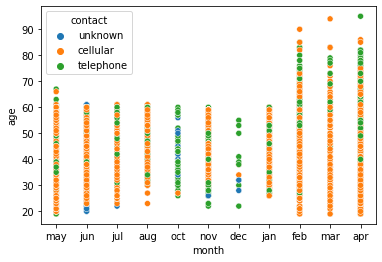

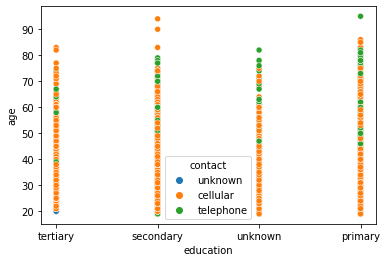

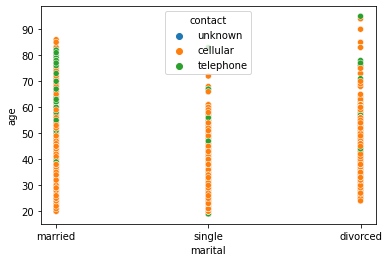

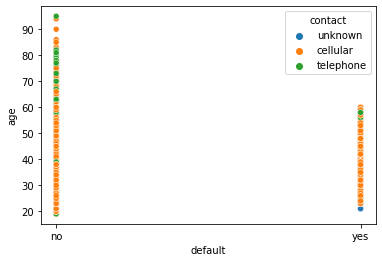

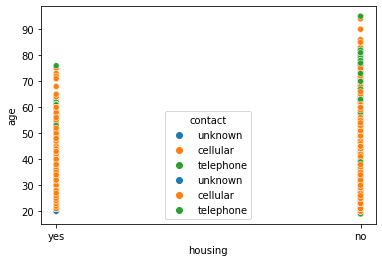

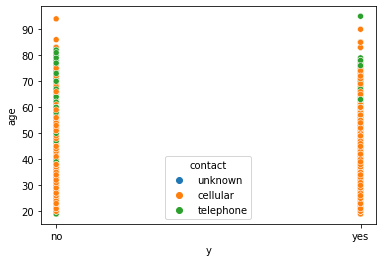

In [359]:
# try to do a bar chart.  rename the months . 1.jan 2.feb 3.march etc
#get rid of this


# unable to do line shart with these. 

#Scatterplots showing method of contact between age and month, education, marital, defaulting on loans, housing, loan, and independent variable.

#In october, the majority of calls were done through telephone only when comparing age to month. December sees a similar situation happening on a lower scale. 

#The most calls are seen in April when compared with age.



data = pd.read_csv("term-deposit-marketing-2020.csv")

sns.scatterplot(x='month', y='age', data=data,
               hue='contact')
plt.show()

sns.scatterplot(x='education', y='age', data=data,
               hue='contact')
plt.show()
sns.scatterplot(x='marital', y='age', data=data,
               hue='contact')
plt.show()
sns.scatterplot(x='default', y='age', data=data,
               hue='contact')
plt.show()
sns.scatterplot(x='housing', y='age', data=data,
               hue='contact')
sns.scatterplot(x='loan', y='age', data=data,
               hue='contact')
plt.show()
sns.scatterplot(x='y', y='age', data=data,
               hue='contact')

plt.show()

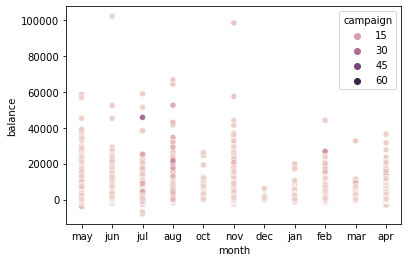

In [360]:
# Campaign number past 15 are seen more in july and august. Also noted is that the two highest points are campaign 15 and under.
#rename columns for months 1.jan 2.feb 3.march

data = pd.read_csv("term-deposit-marketing-2020.csv")

sns.scatterplot(x='month', y='balance', data=data,
               hue='campaign')
plt.show()



In [361]:
df['y'] = df['y'] == 'yes'

In [362]:
#creating subscribed to term deposit yes =1 and no = 0. This lets us seperate between subscribed and not subscribed. 
df_yes = df[df['y'] == 1]
df_no = df[df['y'] == 0]
#undersampling? how to deal with class imbalance?
# around 7.2% are have subscribed and 92.7% have not subscribed. one class has 7.2% (minority), the other class has 92.7% (majority). Data is imbalanced, might get good accuracy. Model will always pick the majority class aggressively versus minority class.  
df[df['y']==0]['y'].count(), df[df['y']==1]['y'].count()

(37104, 2896)

In [363]:
#once you are done with eda, get percentages of dependent variable
#realize its undersampling
#do a stratified split of the entire dataset that I have. train test split . 
#df train df test 70/30 is stratified. find a stratified split 
#df train dataframe, random undersampling for the majority class. 
#run a model, random forest , xgboost, 
# test model with df dataset that is seperate
# drawback of oversampling it can overfit model
#drawback of undersample. you can loose some information. need to ensure that you have enough data. 

In [364]:
#only x train y train sampling
#create single data set of x train and y train
#axis = 0 is row wise up and down 
#axis =1 is side by side 

In [365]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    stratify=y, 
                                                    test_size=0.30)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(7000, 20) (3000, 20) (7000,) (3000,)


In [366]:
# class count
class_count_0, class_count_1 = data['y'].value_counts()

# Separate class
class_0 = df[df['y'] == 0]
class_1 = df[df['y'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (37104, 14)
class 1: (2896, 14)


total class of 1 and 0: False    2896
True     2896
Name: y, dtype: int64


Text(0, 0.5, 'Count')

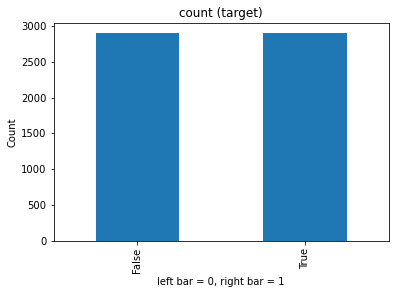

In [367]:
#True stands for 1 while false stands for 0

class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis = 0)

print("total class of 1 and 0:",test_under['y'].value_counts())# plot the count after under-sampeling
test_under['y'].value_counts().plot(kind='bar', title='count (target)')
plt.xlabel("left bar = 0, right bar = 1")
plt.ylabel("Count")

total class of 1 and 0: False    2896
True     2896
Name: y, dtype: int64


Text(0, 0.5, 'Count')

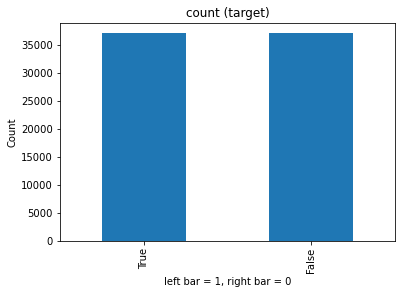

In [368]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_under['y'].value_counts())# plot the count after under-sampeling
test_over['y'].value_counts().plot(kind='bar', title='count (target)')
plt.xlabel("left bar = 1, right bar = 0")
plt.ylabel("Count")


In [369]:

# define dataset
# only on the training undersampling. only on the training.
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))




Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


In [370]:
# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


In [371]:

# define dataset
# only on the training undersampling. only on the training.
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# summarize class distribution
print(Counter(y))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')
X_over, y_over = undersample.fit_resample(X, y)
# summarize class distribution
print(Counter(y_over))

Counter({0: 9900, 1: 100})
Counter({0: 100, 1: 100})


In [372]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)

print('original dataset shape:', Counter(y))
print('Resample dataset shape', Counter(y_rus))

original dataset shape: Counter({0: 9900, 1: 100})
Resample dataset shape Counter({0: 100, 1: 100})


In [373]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

# fit predictor and target variable
x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9900, 1: 100})
Resample dataset shape Counter({0: 9900, 1: 9900})


In [374]:
tl = RandomOverSampler(sampling_strategy='majority')

# fit predictor and target variable
x_tl, y_tl = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9900, 1: 100})
Resample dataset shape Counter({0: 9900, 1: 9900})


In [375]:

# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('over', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.993


In [376]:

# define dataset
X, y = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
# define pipeline
steps = [('under', RandomOverSampler()), ('model', DecisionTreeClassifier())]
pipeline = Pipeline(steps=steps)
# evaluate pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, y, scoring='f1_micro', cv=cv, n_jobs=-1)
score = mean(scores)
print('F1 Score: %.3f' % score)

F1 Score: 0.990


In [377]:
from sklearn.svm import SVC

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance

print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

Accuracy score: 0.986
F1 score: 0.34375


In [378]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)# check performance

print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))

Accuracy score: 0.9923333333333333
F1 score: 0.37837837837837834


In [379]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({0: 9900, 1: 100})
Resample dataset shape Counter({0: 9900, 1: 9900})


In [380]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()

x_nm, y_nm = nm.fit_resample(X, y)

print('Original dataset shape:', Counter(y))
print('Resample dataset shape:', Counter(y_nm))

Original dataset shape: Counter({0: 9900, 1: 100})
Resample dataset shape: Counter({0: 100, 1: 100})


In [381]:
logReg.fit(X_train, y_train)

LogisticRegression()

In [382]:
#We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

#What makes the customers buy? Tell us which feature we should be focusing more on. 

SyntaxError: invalid syntax (Temp/ipykernel_3392/1270723526.py, line 1)